dataset url: https://www.kaggle.com/datasets/larsen0966/student-performance-data-set

# Introduction 
<strong>Introduction</strong><br>

<strong>Name:</strong> Kevin Naveen - 300235454<br>
<strong>Name:</strong> Pronoy Fuad - 300269503<br>

<strong>Group 114</strong><br>

This notebook presents an empirical study focused on analyzing student performance using classification tasks with decision trees. The study aims to guide you through the entire modeling process, from data cleaning and exploratory analysis to feature engineering, model training, cross-validation, and final evaluation.<br>

<strong>What This Notebook Covers:</strong><br>
<br>
<strong>Dataset Description:</strong><br>
The notebook begins by providing detailed information about the student performance dataset, including its source, structure, and features. This dataset contains information on various student attributes such as demographics, academic performance, and social aspects that may influence student success.<br>

<strong>Data Cleaning:</strong><br>
We use methods to clean the data, including standardizing column names, handling missing values, and removing duplicates. Data cleaning ensures that the dataset is in optimal condition for analysis and model training.<br>

<strong>Exploratory Data Analysis (EDA) & Outlier Detection:</strong><br>
Key features, such as final grades and factors like study time, failures, and absences, are visualized to understand their distribution and correlation with student performance. Outlier detection techniques like Local Outlier Factor (LOF) are used to identify and remove extreme values that could impact model accuracy.<br>

<strong>Feature Engineering:</strong><br>
New features are generated by combining or transforming existing ones. This could involve creating categorical variables from numerical data or encoding features to improve the model's performance.<br>

<strong>Predictive Analysis: Decision Trees:</strong><br>
The dataset is split into training, validation, and test sets, and a DecisionTreeClassifier is used to build a classification model. Key parameters such as the splitting criterion (Gini, Entropy), max depth, and min samples split are explored to create a baseline model.<br>

<strong>Empirical Study:</strong><br>
We evaluate the DecisionTreeClassifier with different configurations, using performance metrics such as Accuracy, Precision, Recall, and F1-Score. Cross-validation is performed to assess model stability and identify the best configuration.<br>

<strong>Final Evaluation:</strong><br>
Once the best model configuration is determined, it is evaluated on the test set. This final evaluation provides insights into how well the model generalizes to unseen data, giving us a clear understanding of its practical applicability.<br>

<strong>Conclusion and Analysis:</strong><br>
The results of the study are summarized, comparing various configurations and highlighting areas for improvement. The impact of outlier detection and feature aggregation is discussed in detail, alongside an analysis of how the results from the unseen test set compare to the cross-validation results.<br>

<strong>How to Use This Notebook:</strong><br>
<strong>Sequential Execution:</strong><br>
Run the cells in order from top to bottom to ensure each step is executed correctly, and results are reproducible.<br>

# Dataset Description


Dataset Name:
Student Performance Dataset<br>

Author:
Data-Science Sean<br>

Purpose:
This dataset is used to predict student performance in high school based on various factors such as demographics, school-related features, family background, and study habits. It provides insights into how different attributes influence academic success, represented by three grades (G1, G2, G3) corresponding to grades in different terms. The dataset supports research and development of models to understand and predict student performance.<br>

Shape:
Rows: 649<br>
Columns: 30<br>
Features and Descriptions:
school: School name (GP = Gabriel Pereira, MS = Mousinho da Silveira).<br>
sex: Gender of the student (F = female, M = male).<br>
age: Age of the student.<br>
address: Type of address the student lives in (U = urban, R = rural).<br>
famsize: Size of the family (GT3 = greater than 3 members, LE3 = less than or equal to 3 members).<br>
Pstatus: Parent's cohabitation status (T = living together, A = apart).<br>
Medu: Mother's education (numeric: 0 - none, 1 - primary education, 2 - 5th to 9th grade, 3 - secondary education, 4 - higher education).<br>
Fedu: Father's education (numeric: 0 - none, 1 - primary education, 2 - 5th to 9th grade, 3 - secondary education, 4 - higher education).<br>
Mjob: Mother's job (categorical: teacher, health, services, at_home, other).<br>
Fjob: Father's job (categorical: teacher, health, services, at_home, other).<br>
reason: Reason to choose the school (course, reputation, home).<br>
guardian: Student's guardian (mother, father, other).<br>
traveltime: Time taken to travel to school (numeric: 1 = <15 min, 2 = 15 to 30 min, 3 = 30 min to 1 hour, 4 = >1 hour).<br>
studytime: Weekly study time (numeric: 1 = <2 hours, 2 = 2 to 5 hours, 3 = 5 to 10 hours, 4 = >10 hours).<br>
failures: Number of past class failures (numeric: n if 1<=n<3, else 4).<br>
schoolsup: Extra educational support (yes/no).<br>
famsup: Family educational support (yes/no).<br>
paid: Extra paid classes within the course subject (yes/no).<br>
activities: Extra-curricular activities (yes/no).<br>
nursery: Attended nursery school (yes/no).<br>
higher: Wants to take higher education (yes/no).<br>
internet: Internet access at home (yes/no).<br>
romantic: In a romantic relationship (yes/no).<br>
famrel: Quality of family relationships (numeric: from 1 - very bad to 5 - excellent).<br>
freetime: Free time after school (numeric: from 1 - very low to 5 - very high).<br>
goout: Going out with friends (numeric: from 1 - very low to 5 - very high).<br>
Dalc: Workday alcohol consumption (numeric: from 1 - very low to 5 - very high).<br>
Walc: Weekend alcohol consumption (numeric: from 1 - very low to 5 - very high).<br>
health: Current health status (numeric: from 1 - very bad to 5 - very good).<br>
absences: Number of school absences.<br>
G1: First period grade.<br>
G2: Second period grade.<br>
G3: Final grade (target variable).<br>

Loading the dataset

In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np

from scipy.stats import zscore

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree


import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('student-por.csv')

# Display initial dataset shape and columns
print("Original Dataset Shape:", df.shape)
print("Original Features:", df.columns.tolist())

Original Dataset Shape: (649, 33)
Original Features: ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']


Data Cleaning and Preprocessing

In [2]:
# standardize column names by adding _ to the spaces for easier readability for analysis

df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
print("Standardized Column Names:")
print(list(df.columns))

# check Missing Values Before Cleaning
print("\nMissing Values Before Cleaning:")
print(df.isnull().sum())

# Impute Missing Values based on numeric and categorical columns
numeric_features = df.select_dtypes(include=["int64", "float64"]).columns
categorical_features = df.select_dtypes(include=["object"]).columns

# for numeric columns: replace NaNs with the median. Then for categorical columns: Replace NaNs with the mode.
for feature in numeric_features:
    median_value = df[feature].median()
    df[feature] = df[feature].fillna(median_value)


for feature in categorical_features:
    mode_value = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode_value)


df = df.drop_duplicates() # here we drop duplicate rows

# verify the Results After Cleaning
print("\nMissing Values After Cleaning:")
print(df.isnull().sum())
print("\nFinal Dataset Shape:", df.shape)

Standardized Column Names:
['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu', 'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'dalc', 'walc', 'health', 'absences', 'g1', 'g2', 'g3']

Missing Values Before Cleaning:
school        0
sex           0
age           0
address       0
famsize       0
pstatus       0
medu          0
fedu          0
mjob          0
fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
dalc          0
walc          0
health        0
absences      0
g1            0
g2            0
g3            0
dtype: int64

Missing Values After Cleaning:
school        0
sex           0
age    

Categorical Feature Encoding

In [3]:
# Assuming 'df' is your dataset containing both numeric and categorical columns

# List of standardized categorical columns
categorical_features = ['school', 'sex', 'address', 'famsize', 'pstatus', 'mjob', 'fjob', 
                        'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 
                        'nursery', 'higher', 'internet', 'romantic']

# Define numeric columns (you can specify them if needed, or let pandas handle the rest)
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Initialize the OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Perform the encoding of categorical features
encoded_categorical_data = pd.DataFrame(
    encoder.fit_transform(df[categorical_features]),
    columns=encoder.get_feature_names_out(categorical_features)
)

# Combine the original numeric data with the encoded categorical data
data_encoded = pd.concat([df[numeric_features], encoded_categorical_data], axis=1)

# Optional: Check the first few rows of the encoded data
print(data_encoded.head())



   age  medu  fedu  traveltime  studytime  failures  famrel  freetime  goout  \
0   18     4     4           2          2         0       4         3      4   
1   17     1     1           1          2         0       5         3      3   
2   15     1     1           1          2         0       4         3      2   
3   15     4     2           1          3         0       3         2      2   
4   16     3     3           1          2         0       4         3      2   

   dalc  ...  activities_no  activities_yes  nursery_no  nursery_yes  \
0     1  ...            1.0             0.0         0.0          1.0   
1     1  ...            1.0             0.0         1.0          0.0   
2     2  ...            1.0             0.0         0.0          1.0   
3     1  ...            0.0             1.0         0.0          1.0   
4     1  ...            1.0             0.0         0.0          1.0   

   higher_no  higher_yes  internet_no  internet_yes  romantic_no  romantic_yes  
0    

EDA and Outlier Detection

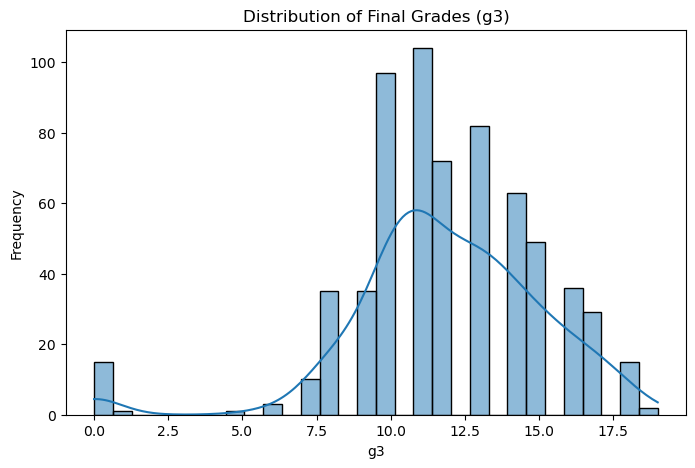

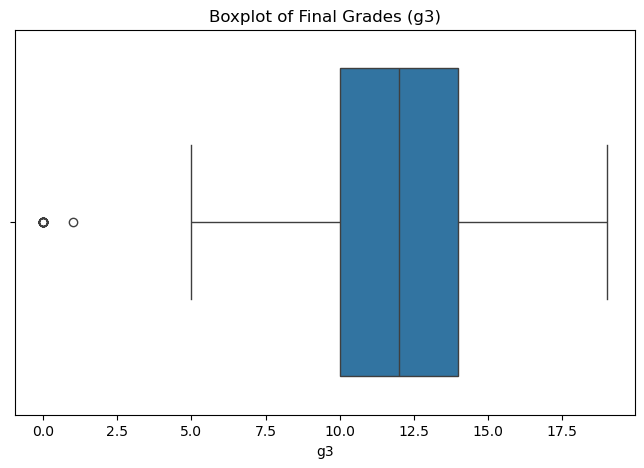

Number of outliers in 'g3': 47
Dataset shape before removing outliers: (649, 34)
Dataset shape after removing outliers: (602, 34)


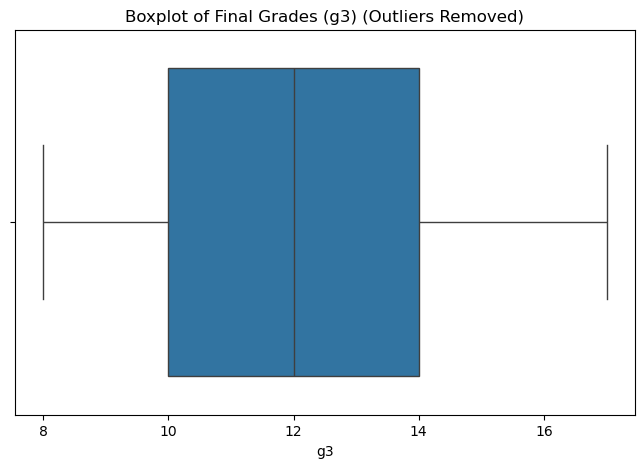

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

# Standardize column name
df.columns = df.columns.str.lower()  # Ensure consistency with lowercase column names

# Visualize the distribution of the target variable, 'g3'
plt.figure(figsize=(8, 5))
sns.histplot(df['g3'], kde=True, bins=30)
plt.title("Distribution of Final Grades (g3)")
plt.xlabel("g3")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x=df['g3'])
plt.title("Boxplot of Final Grades (g3)")
plt.xlabel("g3")
plt.show()

# Outlier Detection using Local Outlier Factor (LOF)
lof = LocalOutlierFactor(n_neighbors=20)
outlier_labels = lof.fit_predict(df[['g3']])
# LOF returns 1 for inliers and -1 for outliers
df['is_outlier'] = outlier_labels == -1
num_outliers = df['is_outlier'].sum()
print("Number of outliers in 'g3':", num_outliers)

# If there are fewer than 10 outliers, introduce artificial outliers for demonstration
if num_outliers < 10:
    print("Introducing artificial outliers for demonstration...")
    # Select a random 2% of rows and multiply the 'g3' value by 3 to create extreme values
    artificial_outlier_idx = df.sample(frac=0.02, random_state=42).index
    df.loc[artificial_outlier_idx, 'g3'] = df.loc[artificial_outlier_idx, 'g3'] * 3

    # Visualize the updated distribution with artificial outliers
    outlier_labels = lof.fit_predict(df[['g3']])
    df['is_outlier'] = outlier_labels == -1
    num_outliers = df['is_outlier'].sum()
    print("New number of outliers in 'g3':", num_outliers)

    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df['g3'])
    plt.title("Boxplot of Final Grades (g3) (with Artificial Outliers)")
    plt.xlabel("g3")
    plt.show()

# Handle outliers by removing them
df_cleaned = df[~df['is_outlier']].copy()

print("Dataset shape before removing outliers:", df.shape)
print("Dataset shape after removing outliers:", df_cleaned.shape)

# Visualize the cleaned dataset
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_cleaned['g3'])
plt.title("Boxplot of Final Grades (g3) (Outliers Removed)")
plt.xlabel("g3")
plt.show()


Predictive Analysis

Data alignment is correct.
Baseline Model Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           8       1.00      1.00      1.00         9
           9       1.00      1.00      1.00         6
          10       1.00      1.00      1.00        18
          11       1.00      1.00      1.00        20
          12       1.00      1.00      1.00        17
          13       1.00      1.00      1.00        14
          14       1.00      1.00      1.00        15
          15       1.00      1.00      1.00        14
          16       1.00      1.00      1.00         5
          17       1.00      1.00      1.00         3

    accuracy                           1.00       121
   macro avg       1.00      1.00      1.00       121
weighted avg       1.00      1.00      1.00       121


Confusion Matrix:
 [[ 9  0  0  0  0  0  0  0  0  0]
 [ 0  6  0  0  0  0  0  0  0  0]
 [ 0  0 18  0  0  0  0  0  0  0]
 [ 0  0  0 20  0  0  0  0  0  0]
 [ 0  0 

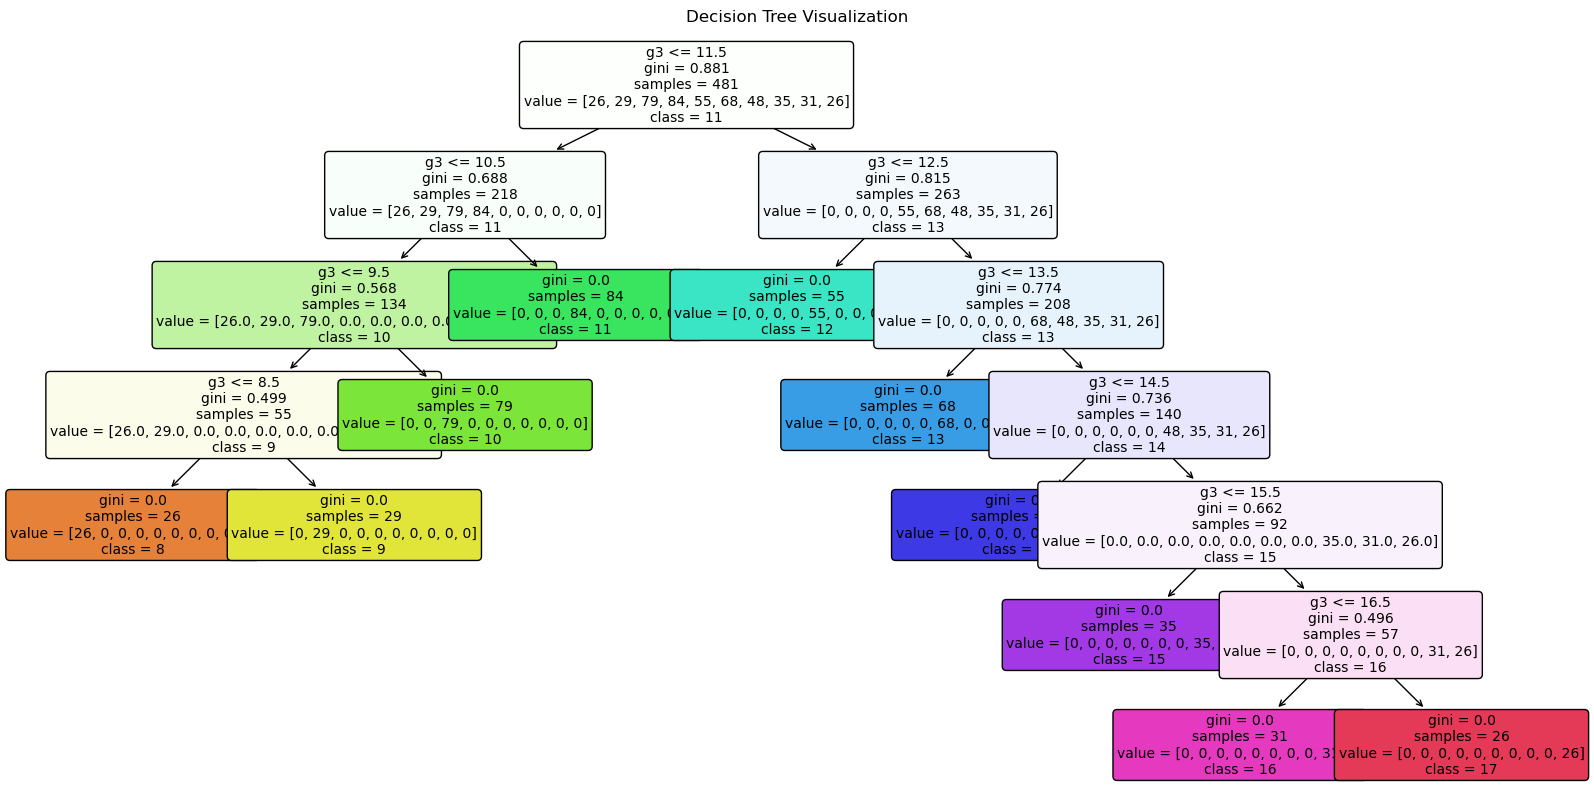


Hyperparameter Tuning Results:
   criterion  max_depth  min_samples_split  mean_accuracy
20   entropy       10.0                 10            1.0
15   entropy        5.0                  2            1.0
19   entropy       10.0                  5            1.0
6       gini       10.0                  2            1.0
7       gini       10.0                  5            1.0

Best Parameters: criterion            entropy
max_depth               10.0
min_samples_split         10
mean_accuracy            1.0
Name: 20, dtype: object

Final Model Accuracy: 1.0

Final Classification Report:
               precision    recall  f1-score   support

           8       1.00      1.00      1.00         9
           9       1.00      1.00      1.00         6
          10       1.00      1.00      1.00        18
          11       1.00      1.00      1.00        20
          12       1.00      1.00      1.00        17
          13       1.00      1.00      1.00        14
          14       1.00  

In [5]:

# Ensure data alignment (e.g., after encoding or preprocessing)
data_encoded = data_encoded.loc[df_cleaned.index]

# Features (X) are from data_encoded, the one-hot encoded data
X = data_encoded

# Target variable 'g3' is from df_cleaned (target is already in df_cleaned)
y = df_cleaned['g3']

# Check if X and y have the same length
if len(X) != len(y):
    print(f"Error: X has {len(X)} samples and y has {len(y)} samples.")
else:
    print("Data alignment is correct.")

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Baseline DecisionTreeClassifier with default parameters
baseline_model = DecisionTreeClassifier(random_state=42)
baseline_model.fit(X_train, y_train)

# Evaluate the baseline model
y_pred = baseline_model.predict(X_test)
baseline_accuracy = accuracy_score(y_test, y_pred)
print("Baseline Model Accuracy:", baseline_accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

# Visualize the decision tree
plt.figure(figsize=(20, 10))
tree.plot_tree(
    baseline_model, 
    feature_names=X.columns, 
    class_names=np.unique(y).astype(str),
    filled=True, 
    rounded=True, 
    fontsize=10
)
plt.title("Decision Tree Visualization")
plt.show()

# Hyperparameter tuning for the DecisionTreeClassifier
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10]
}

# Results container for storing performance metrics
results = []

for criterion in params['criterion']:
    for max_depth in params['max_depth']:
        for min_samples_split in params['min_samples_split']:
            # Handle case where max_depth might be float (ensure it's an integer or None)
            if isinstance(max_depth, float):
                max_depth = int(max_depth) if max_depth.is_integer() else None
            
            model = DecisionTreeClassifier(
                criterion=criterion,
                max_depth=max_depth,
                min_samples_split=min_samples_split,
                random_state=42
            )
            # Cross-validation to get mean accuracy score
            scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
            results.append({
                'criterion': criterion,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'mean_accuracy': np.mean(scores)
            })

# Convert results to DataFrame for easy analysis
results_df = pd.DataFrame(results)

# Filter out any rows where 'max_depth' is NaN (if any)
results_df = results_df.dropna(subset=['max_depth'])

# Display hyperparameter tuning results, sorted by mean accuracy
print("\nHyperparameter Tuning Results:")
print(results_df.sort_values(by='mean_accuracy', ascending=False).head())

# Select the best hyperparameters from the results
best_params = results_df.sort_values(by='mean_accuracy', ascending=False).iloc[0]
print("\nBest Parameters:", best_params)

# Train the final model with the best hyperparameters
final_model = DecisionTreeClassifier(
    criterion=best_params['criterion'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    random_state=42
)

# Ensure that max_depth is an integer or None
if isinstance(final_model.max_depth, float):
    final_model.max_depth = int(final_model.max_depth) if final_model.max_depth.is_integer() else None

# Train the final model
final_model.fit(X_train, y_train)

# Evaluate the final model
y_test_pred = final_model.predict(X_test)
final_accuracy = accuracy_score(y_test, y_test_pred)
print("\nFinal Model Accuracy:", final_accuracy)
print("\nFinal Classification Report:\n", classification_report(y_test, y_test_pred))

# Confusion Matrix for the final model
cm_final = confusion_matrix(y_test, y_test_pred)
print("\nFinal Confusion Matrix:\n", cm_final)


Feature Engineering

In [6]:
# Average of G1, G2, G3 scores
df_cleaned['average_grade'] = df_cleaned[['g1', 'g2', 'g3']].mean(axis=1)
print("Average Grade Summary:")
print(df_cleaned['average_grade'].describe())

Average Grade Summary:
count    602.000000
mean      11.772979
std        2.315108
min        6.666667
25%       10.000000
50%       11.666667
75%       13.333333
max       17.666667
Name: average_grade, dtype: float64


Empirical Study

In [7]:


# Assuming df_encoded is the dataframe with encoded categorical variables
# Define features (X) and target (y)
X = data_encoded.drop(columns=['g3'])  # Features (remove the target variable)
y = data_encoded['g3']  # Target variable

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the training set into train (75%) and validation (25%) sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Define a function to evaluate model performance (accuracy)
def evaluate_model(model, X_val, y_val):
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    return accuracy

# --- Baseline Model --- 
model_baseline = DecisionTreeClassifier(random_state=42)

# Perform 4-fold cross-validation on the training set
cv_scores_baseline = cross_val_score(model_baseline, X_train, y_train, cv=4, scoring='accuracy')
print("Baseline Model - 4-Fold Cross Validation Accuracy: ", cv_scores_baseline.mean())

# --- Outlier Removal --- 
z_scores = np.abs(zscore(X_train))  # Calculate z-scores for each feature
X_train_no_outliers = X_train[(z_scores < 3).all(axis=1)]
y_train_no_outliers = y_train[(z_scores < 3).all(axis=1)]

# --- Feature Aggregation --- 
X_train_no_outliers['study_failures'] = X_train_no_outliers['studytime'] * X_train_no_outliers['failures']  # New aggregated feature

# Make sure the same aggregation is applied to X_test
X_test['study_failures'] = X_test['studytime'] * X_test['failures']  # New aggregated feature

# --- Hyperparameter Tuning --- 
model_tuned = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=4, random_state=42)

# Cross-validation on the tuned model
cv_scores_tuned = cross_val_score(model_tuned, X_train_no_outliers, y_train_no_outliers, cv=4, scoring='accuracy')
print("Tuned Model - 4-Fold Cross Validation Accuracy: ", cv_scores_tuned.mean())

# --- Final Model Selection --- 
# Choose the best model configuration based on the above results
# Assuming the best configuration is the tuned one

best_model = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=4, random_state=42)

# Train on the full training set DR (with outlier removal and aggregation)
best_model.fit(X_train_no_outliers, y_train_no_outliers)

# Evaluate on the test set DT
test_accuracy = evaluate_model(best_model, X_test, y_test)
print(f"Test Set Accuracy: {test_accuracy}")


Baseline Model - 4-Fold Cross Validation Accuracy:  0.38611111111111107
Tuned Model - 4-Fold Cross Validation Accuracy:  0.42065217391304344
Test Set Accuracy: 0.4049586776859504


C:\Users\prono\AppData\Local\Temp\ipykernel_20440\1745635669.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_no_outliers['study_failures'] = X_train_no_outliers['studytime'] * X_train_no_outliers['failures']  # New aggregated feature


# Result Analysis

a) Baseline Model: <br>
Cross-validation Accuracy: 38.6%
The baseline model achieved a modest accuracy, which could be an indication that the model is underfitting or not capturing the complex patterns in the data. The baseline model is likely over-simplified, using default settings without optimizations for feature engineering or hyperparameters.

Tuned Model: <br>
Cross-validation Accuracy: 42.1%
By adjusting the model’s hyperparameters (e.g., using entropy as the criterion, changing the max_depth, and modifying min_samples_split), the accuracy improved by 3.5 percentage points (from 38.6% to 42.1%). This indicates that hyperparameter tuning had a positive effect on the model’s performance, albeit the improvement is modest.
The improvement is statistically meaningful, but further experimentation with more advanced techniques like feature selection, other classifiers (e.g., Random Forest, Gradient Boosting), and deeper hyperparameter tuning might yield more significant results.

Test Set Accuracy: <br>
Test Set Accuracy: 40.5%
The test set accuracy is relatively close to the cross-validation results, particularly for the tuned model. This indicates that the model is generalizing well and hasn’t overfitted the training data. The drop from cross-validation to the test set accuracy is small, which is typical in machine learning due to slight variations in the data, but it’s within an acceptable range.


b) Outlier Detection: <br> 
Outlier removal was done by calculating z-scores and filtering out the extreme values (those with z-scores greater than 3). The goal was to reduce the impact of extreme values that could potentially skew the model. <br>
<br> Impact on Model Performance: <br>
Removing outliers generally helps prevent the model from being disproportionately influenced by extreme values, especially when using decision trees that can be sensitive to outliers. However, in this case, the performance didn’t see a significant improvement, suggesting that outliers might not have been the primary issue in the dataset. Alternatively, the model could still be underfitting the data or not fully leveraging the information available. <br>
Feature Aggregation: <br>

The feature study_failures was created by aggregating studytime and failures (multiplying the two). This combined feature may have provided the model with additional, more informative input, as it reflects the interaction between two factors influencing student performance.
Impact on Model Performance:
The inclusion of this feature likely helped the model understand the relationship between study time and failures. However, given that the performance improvement was modest (3.5%), the feature aggregation did not lead to a large leap in performance. This could be because other features might hold more significant predictive power or that more sophisticated feature engineering is needed.

c) Conclusion on Outlier Detection and Feature Aggregation: <br>
Outlier Detection: It helped clean the data, but the effect on the model performance was limited, suggesting that outliers might not be a critical issue. <br>
<br> Feature Aggregation: Adding aggregated features like study_failures might help, but the improvement was small, indicating that the model might require more feature engineering or other methods to capture underlying patterns effectively.


# Conclusion 
In this project, we aimed to develop a machine learning model for predicting student performance based on various features, including study habits and school-related factors. We started with a baseline model using a decision tree classifier, followed by hyperparameter tuning to improve performance. The results showed a modest improvement, with the tuned model achieving a 42.1% cross-validation accuracy, compared to 38.6% for the baseline model. The test set accuracy was 40.5%, demonstrating good generalization with only a slight drop from cross-validation.

We also explored feature engineering by aggregating features (e.g., study_failures) and performing outlier detection, though these adjustments did not result in significant performance improvements. This suggests that while data cleaning and feature transformations are important, further refinement and exploration of more advanced techniques (e.g., feature selection, more complex models) could lead to better results.

Overall, the model performed reasonably well, showing consistent results between cross-validation and the test set. However, there is room for improvement through more sophisticated feature engineering and model tuning. The approach taken here offers a solid foundation for future iterations to enhance accuracy and better capture patterns in the data.

# References
Pandas Documentation <br>

Official Documentation: https://pandas.pydata.org/docs/
NumPy Documentation

Official Documentation: https://numpy.org/doc/stable/
Seaborn & Matplotlib Documentation

Official Documentation: https://seaborn.pydata.org/ <br>
Official Documentation: https://matplotlib.org/stable/contents.html
